#Tugas Praktikum
#Instruksi Umum:
1. Anda akan menggunakan dataset "Medical Cost Personal Datasets". Pastikan Anda telah mengunduh dataset ini.

2. Gunakan bahasa pemrograman Python dan library yang sesuai seperti NumPy, Pandas, Matplotlib dan Scikit-Learn untuk melakukan analisis regresi dan SVR.

In [78]:
from IPython.display import clear_output
!pip install gdown
clear_output()
!gdown --id "11XGYVmEhRVuzSMU0bVQ0xOoS0g6ur29V"

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=11XGYVmEhRVuzSMU0bVQ0xOoS0g6ur29V
To: /content/insurance.csv
100% 55.6k/55.6k [00:00<00:00, 56.0MB/s]


#Tugas
1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

3. Lakukan feature scaling jika diperlukan.

4. Buat model multiple linear regression menggunakan Scikit-Learn.

5. Latih model pada data latih dan lakukan prediksi pada data uji.

6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

7. Ulagi langkah 4 dengan menggunakan model SVR. Anda dapat bereksperimen dengan dengan melakukan hyperparameter tunning.

Catatan Tambahan
- Pastikan untuk memberikan penjelasan singkat tentang dataset yang digunakan, termasuk deskripsi variabel-variabel yang relevan.

- Tampilkan visualisasi data yang relevan seperti scatter plot atau grafik lainnya jika diperlukan untuk pemahaman yang lebih baik.

- Analisis hasil yang Anda dapatkan dalam tugas praktikum Anda.

In [98]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.svm import SVR


#Load Data


In [80]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [82]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


#1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

In [83]:
cat_col = df.select_dtypes(include=['object']).columns
for col in cat_col:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


# Variabel bebas
X = df.drop('charges', axis=1)
# X = df['age']
# Variabel target
y = df['charges']

print("Variabel Bebas (X):")
display(X.head())
print("\nVariabel Target (y):")
display(y.head())

Variabel Bebas (X):


,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1



Variabel Target (y):


,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


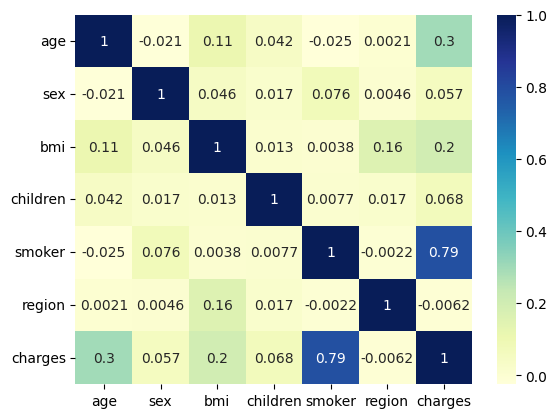

In [85]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [86]:
correlation_charges = df.corr()['charges'].sort_values(ascending=False)

print("Korelasi setiap kolom dengan 'charges':")
print(correlation_charges)

Korelasi setiap kolom dengan 'charges':
charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region     -0.006208
Name: charges, dtype: float64


#2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

In [87]:
# Pembagian data latih dan data uji dengan proporsi 6:4
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [88]:
print(f"\nDimensi data:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")


Dimensi data:
X_train: (802, 6)
X_test: (536, 6)
y_train: (802,)
y_test: (536,)


#3. Lakukan feature scaling jika diperlukan.

In [89]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#3. Buat model multiple linear regression menggunakan Scikit-Learn.

In [90]:
lr_model = LinearRegression()

#4. Latih model pada data latih dan lakukan prediksi pada data uji.

In [91]:
lr_model.fit(X_train, y_train)


LinearRegression()

In [92]:
y_pred_lr = lr_model.predict(X_test)

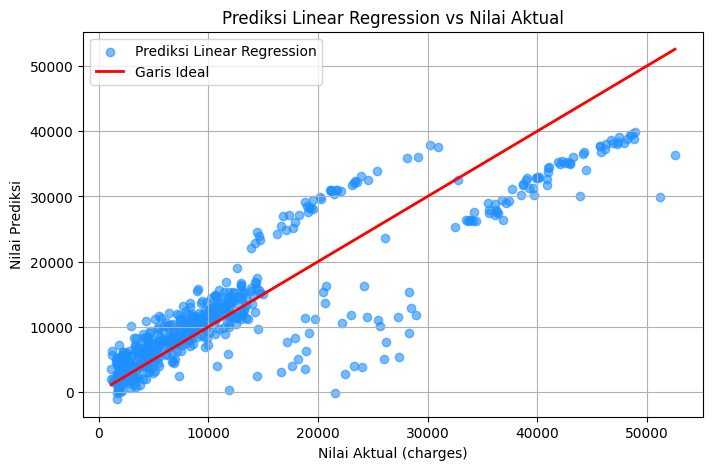

In [93]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_lr, alpha=0.6, color='dodgerblue', label='Prediksi Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Garis Ideal')
plt.xlabel('Nilai Aktual (charges)')
plt.ylabel('Nilai Prediksi')
plt.title('Prediksi Linear Regression vs Nilai Aktual')
plt.legend()
plt.grid(True)
plt.show()

#5. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

In [94]:
# Evaluasi model
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print(f"R-squared: {r2_lr:.4f}")
print(f"MSE: {mse_lr:.2f}")
print(f"MAE: {mae_lr:.2f}")

R-squared: 0.7877
MSE: 32861464.87
MAE: 4045.93


#7. Ulagi langkah 4 dengan menggunakan model SVR. Anda dapat bereksperimen dengan dengan melakukan hyperparameter tunning.

In [95]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [96]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5, 1],
    'kernel': ['linear', 'rbf']
}

In [99]:
# Grid Search dengan cross-validation
from sklearn.model_selection import train_test_split, GridSearchCV
svr_model = GridSearchCV(
    SVR(),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

In [100]:
print("Melakukan hyperparameter tuning untuk SVR...")
svr_model.fit(X_train_scaled, y_train)
print(f"\nBest parameters: {svr_model.best_params_}")

Melakukan hyperparameter tuning untuk SVR...
Fitting 5 folds for each of 32 candidates, totalling 160 fits

Best parameters: {'C': 100, 'epsilon': 0.01, 'kernel': 'linear'}


In [101]:
# Evaluasi Model
y_pred_svr = svr_model.predict(X_test_scaled)

# SVR
r2_svr = r2_score(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

print(f"R-squared: {r2_svr:.4f}")
print(f"MSE: {mse_svr:.2f}")
print(f"MAE: {mae_svr:.2f}")

R-squared: 0.6104
MSE: 60309865.77
MAE: 3844.59


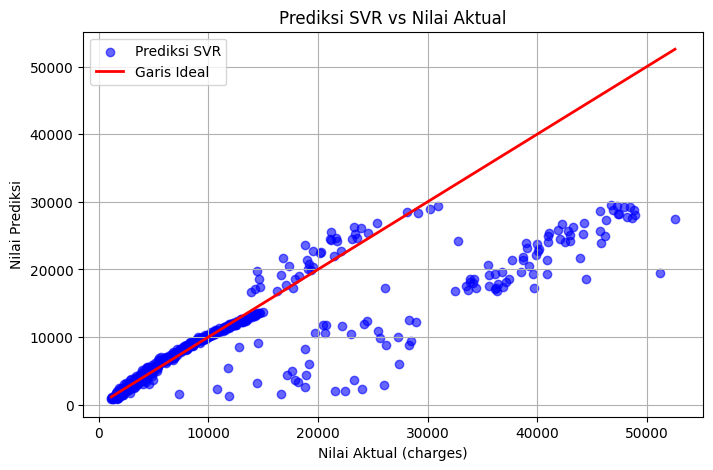

In [103]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_svr, alpha=0.6, color='blue', label='Prediksi SVR')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', lw=2, label='Garis Ideal')
plt.xlabel('Nilai Aktual (charges)')
plt.ylabel('Nilai Prediksi')
plt.title('Prediksi SVR vs Nilai Aktual')
plt.legend()
plt.grid(True)
plt.show()

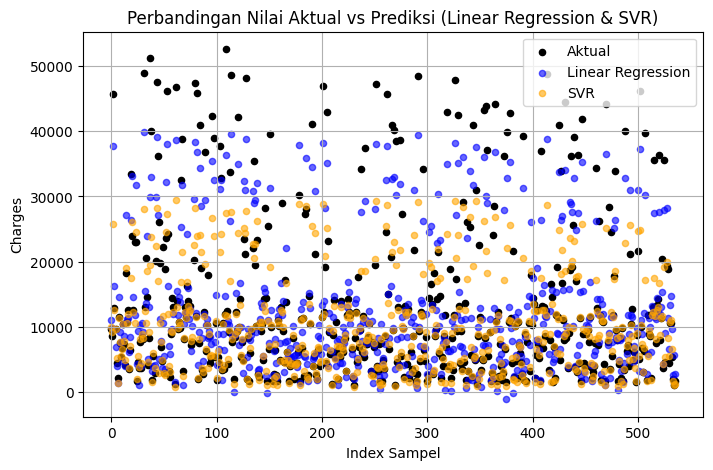

In [104]:
plt.figure(figsize=(8,5))
plt.scatter(range(len(y_test)), y_test, color='black', label='Aktual', s=20)
plt.scatter(range(len(y_test)), y_pred_lr, color='blue', alpha=0.6, label='Linear Regression', s=20)
plt.scatter(range(len(y_test)), y_pred_svr, color='orange', alpha=0.6, label='SVR', s=20)
plt.title('Perbandingan Nilai Aktual vs Prediksi (Linear Regression & SVR)')
plt.xlabel('Index Sampel')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.show()

Berdasarkan hasil evaluasi kedua model, diperoleh

Linear Regression memiliki:
- R-squared sebesar 0.7877
- MSE sebesar 32,861,464.87,
- MAE sebesar 4045.93.

SVR
- R-squared 0.6104
- MSE sebesar 60,309,865.77
- MAE sebesar 3844.59.

jadi model Linear Regression menghasilkan R-squared 0.7877 sedangkan SVR hanya sekitar 0.6104. Hal ini menunjukkan bahwa Linear Regression memiliki kemampuan prediktif yang lebih baik dalam menjelaskan hubungan antar variable. Selain itu, nilai MSE yang lebih rendah pada Linear Regression menandakan bahwa tingkat kesalahan kuadrat rata-ratanya juga lebih kecil dibandingkan SVR.